In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)

In [4]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [7]:
df.shape

(506, 14)

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.shape

(506, 13)

In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
df['MEDV'].value_counts()

50.0    16
25.0     8
21.7     7
22.0     7
23.1     7
        ..
14.2     1
26.7     1
32.9     1
39.8     1
9.7      1
Name: MEDV, Length: 229, dtype: int64

In [12]:
df['MEDV'].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

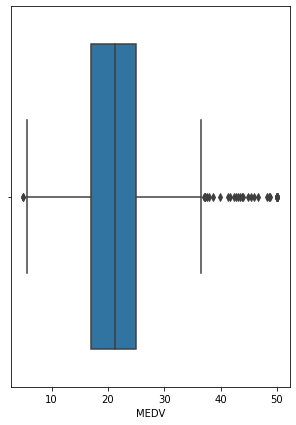

In [13]:
plt.figure(figsize=(5,7))
sns.boxplot(df['MEDV'])
plt.show();

In [14]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

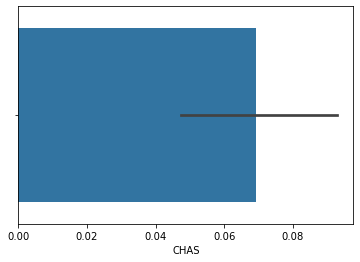

In [15]:
sns.barplot(df['CHAS'])
plt.show();

In [16]:
df['AGE'].value_counts()

100.0    43
97.9      4
96.0      4
95.4      4
98.2      4
         ..
91.6      1
62.0      1
65.1      1
45.7      1
93.4      1
Name: AGE, Length: 356, dtype: int64

In [17]:
df.loc[(df['AGE']<=35),'age_group']='35 years and younger'
df.loc[(df['AGE']>35)&(df['AGE']<70),'age_group']='Between 35 years and 70 years'
df.loc[(df['AGE']>=70),'age_group']='70 years and above'

In [18]:
df['age_group'].value_counts()

70 years and above               287
Between 35 years and 70 years    128
35 years and younger              91
Name: age_group, dtype: int64

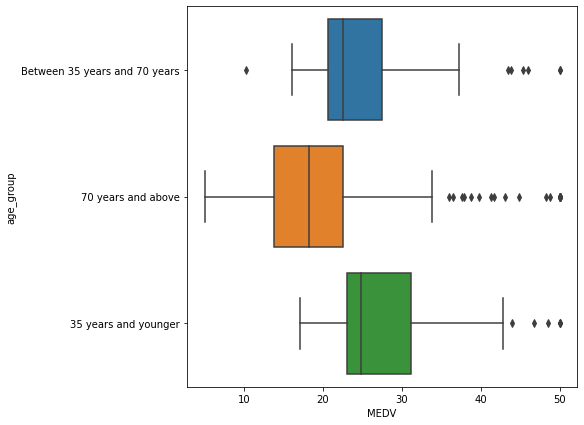

In [19]:
plt.figure(figsize=(7,7))
sns.boxplot(x='MEDV',y='age_group',data=df)
plt.show();

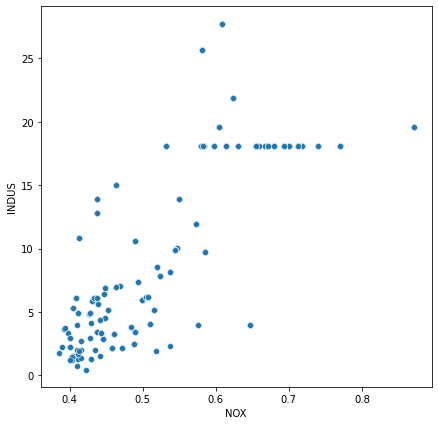

In [20]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='NOX',y='INDUS',data=df)
plt.show();

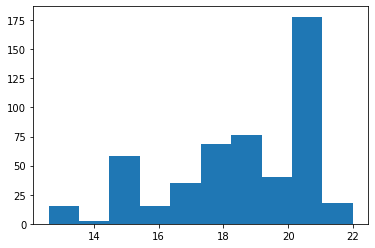

In [21]:
plt.hist(x=df['PTRATIO'],bins=10,histtype='bar')
plt.show();

In [22]:
import scipy.stats

In [23]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [24]:
df['MEDV'].value_counts()

50.0    16
25.0     8
21.7     7
22.0     7
23.1     7
        ..
14.2     1
26.7     1
32.9     1
39.8     1
9.7      1
Name: MEDV, Length: 229, dtype: int64

In [25]:
scipy.stats.ttest_ind(df[df['CHAS']==1]['MEDV'],df[df['CHAS']==0]['MEDV'],equal_var=True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [26]:
##H0=M1=M2
##H1: M1!=M2
##Pvalue>0.05, we accept H0, meaning that there is no difference between in the median value of the houses bounded by Charles river.

In [27]:
df['AGE'].value_counts()

100.0    43
97.9      4
96.0      4
95.4      4
98.2      4
         ..
91.6      1
62.0      1
65.1      1
45.7      1
93.4      1
Name: AGE, Length: 356, dtype: int64

In [28]:
df['age_group'].value_counts()

70 years and above               287
Between 35 years and 70 years    128
35 years and younger              91
Name: age_group, dtype: int64

In [29]:
scipy.stats.levene(df[df['age_group']=='70 years and above']['MEDV'],df[df['age_group']=='Between 35 years and 70 years']['MEDV'],df[df['age_group']=='35 years and younger']['MEDV'],center='mean')

LeveneResult(statistic=2.7806200293748438, pvalue=0.06295337343259205)

In [30]:
seventy_upper=df[df['age_group']=='70 years and above']['MEDV']
thirty_five_seventy=df[df['age_group']=='Between 35 years and 70 years']['MEDV']
thirty_five_lower=df[df['age_group']=='35 years and younger']['MEDV']

In [31]:
f_statistic,p_value=scipy.stats.f_oneway(seventy_upper,thirty_five_seventy,thirty_five_lower)
print("F_Statistic:{0},P-Value:{1}".format(f_statistic,p_value))

F_Statistic:36.40764999196599,P-Value:1.7105011022702984e-15


In [33]:
df['NOX'].value_counts()

0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.518     1
0.394     1
0.435     1
0.385     1
0.422     1
Name: NOX, Length: 81, dtype: int64

In [34]:
df['INDUS'].value_counts()

18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
4.15       1
1.76       1
1.38       1
2.01       1
1.89       1
Name: INDUS, Length: 76, dtype: int64

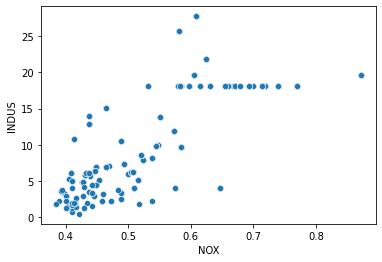

In [35]:
ax=sns.scatterplot(x="NOX",y='INDUS',data=df)

In [36]:
scipy.stats.pearsonr(df['NOX'],df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

In [37]:
##since p-value<0.05,we reject null hypothesis and conclude that there is difference between nitric oxide concentration and proportion of non-retail businesses per town.

In [38]:
x=df['MEDV']
y=df['DIS']
x=sm.add_constant(x)

In [39]:
model=sm.OLS(y,x).fit()

In [40]:
pred=model.predict(x)

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        13:00:12   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""